# Lending Club Case Study


LendingClub is a US peer-to-peer lending company, headquartered in San Francisco, California. It was the first peer-to-peer lender to register its offerings as securities with the Securities and Exchange Commission (SEC), and to offer loan trading on a secondary market. LendingClub is the world's largest peer-to-peer lending platform.

### Goal of the project

Given historical data on loans given out with information on whether or not the borrower defaulted (charge-off), can we build a model that can predict wether or nor a borrower will pay back their loan? This way in the future when we get a new potential customer we can assess whether or not they are likely to pay back the loan.

The "loan_status" column contains our label.

## The Data

We will be using a subset of the LendingClub DataSet obtained from Kaggle: https://www.kaggle.com/wordsforthewise/lending-club

### Data Overview


<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>LoanStatNew</th>
      <th>Description</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>loan_amnt</td>
      <td>The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.</td>
    </tr>
    <tr>
      <th>1</th>
      <td>term</td>
      <td>The number of payments on the loan. Values are in months and can be either 36 or 60.</td>
    </tr>
    <tr>
      <th>2</th>
      <td>int_rate</td>
      <td>Interest Rate on the loan</td>
    </tr>
    <tr>
      <th>3</th>
      <td>installment</td>
      <td>The monthly payment owed by the borrower if the loan originates.</td>
    </tr>
    <tr>
      <th>4</th>
      <td>grade</td>
      <td>LC assigned loan grade</td>
    </tr>
    <tr>
      <th>5</th>
      <td>sub_grade</td>
      <td>LC assigned loan subgrade</td>
    </tr>
    <tr>
      <th>6</th>
      <td>emp_title</td>
      <td>The job title supplied by the Borrower when applying for the loan.*</td>
    </tr>
    <tr>
      <th>7</th>
      <td>emp_length</td>
      <td>Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.</td>
    </tr>
    <tr>
      <th>8</th>
      <td>home_ownership</td>
      <td>The home ownership status provided by the borrower during registration or obtained from the credit report. Our values are: RENT, OWN, MORTGAGE, OTHER</td>
    </tr>
    <tr>
      <th>9</th>
      <td>annual_inc</td>
      <td>The self-reported annual income provided by the borrower during registration.</td>
    </tr>
    <tr>
      <th>10</th>
      <td>verification_status</td>
      <td>Indicates if income was verified by LC, not verified, or if the income source was verified</td>
    </tr>
    <tr>
      <th>11</th>
      <td>issue_d</td>
      <td>The month which the loan was funded</td>
    </tr>
    <tr>
      <th>12</th>
      <td>loan_status</td>
      <td>Current status of the loan</td>
    </tr>
    <tr>
      <th>13</th>
      <td>purpose</td>
      <td>A category provided by the borrower for the loan request.</td>
    </tr>
    <tr>
      <th>14</th>
      <td>title</td>
      <td>The loan title provided by the borrower</td>
    </tr>
    <tr>
      <th>15</th>
      <td>zip_code</td>
      <td>The first 3 numbers of the zip code provided by the borrower in the loan application.</td>
    </tr>
    <tr>
      <th>16</th>
      <td>addr_state</td>
      <td>The state provided by the borrower in the loan application</td>
    </tr>
    <tr>
      <th>17</th>
      <td>dti</td>
      <td>A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.</td>
    </tr>
    <tr>
      <th>18</th>
      <td>earliest_cr_line</td>
      <td>The month the borrower's earliest reported credit line was opened</td>
    </tr>
    <tr>
      <th>19</th>
      <td>open_acc</td>
      <td>The number of open credit lines in the borrower's credit file.</td>
    </tr>
    <tr>
      <th>20</th>
      <td>pub_rec</td>
      <td>Number of derogatory public records</td>
    </tr>
    <tr>
      <th>21</th>
      <td>revol_bal</td>
      <td>Total credit revolving balance</td>
    </tr>
    <tr>
      <th>22</th>
      <td>revol_util</td>
      <td>Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.</td>
    </tr>
    <tr>
      <th>23</th>
      <td>total_acc</td>
      <td>The total number of credit lines currently in the borrower's credit file</td>
    </tr>
    <tr>
      <th>24</th>
      <td>initial_list_status</td>
      <td>The initial listing status of the loan. Possible values are – W, F</td>
    </tr>
    <tr>
      <th>25</th>
      <td>application_type</td>
      <td>Indicates whether the loan is an individual application or a joint application with two co-borrowers</td>
    </tr>
    <tr>
      <th>26</th>
      <td>mort_acc</td>
      <td>Number of mortgage accounts.</td>
    </tr>
    <tr>
      <th>27</th>
      <td>pub_rec_bankruptcies</td>
      <td>Number of public record bankruptcies</td>
    </tr>
  </tbody>
</table>

-----
## Loading the dataset from AWS S3 Bucket
-----

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# might be needed depending on your version of Jupyter
%matplotlib inline

In [3]:
data_info=pd.read_csv('https://machinexdata.s3.us-east-2.amazonaws.com/datasets/Lending+Club+Case+Study/lending_club_info.csv', index_col='LoanStatNew')

In [4]:
data_info.head()

,Description
LoanStatNew,
loan_amnt,The listed amount of the loan applied for by t...
term,The number of payments on the loan. Values are...
int_rate,Interest Rate on the loan
installment,The monthly payment owed by the borrower if th...
grade,LC assigned loan grade


In [5]:
df = pd.read_csv('https://machinexdata.s3.us-east-2.amazonaws.com/datasets/Lending+Club+Case+Study/lending_club_loan_two.csv')

In [6]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650"


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

-----
## Exploratory Data Analysis
-----

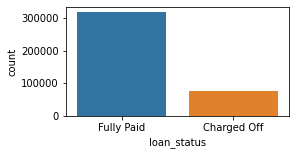

In [8]:
plt.figure(figsize=(4,2))
sns.countplot(df['loan_status'])

In [9]:
Fully_Paid=len(df['loan_status'][df['loan_status']=='Fully Paid'])/len(df['loan_status'])
Charged_Off=len(df['loan_status'][df['loan_status']=='Charged Off'])/len(df['loan_status'])
np.array([Fully_Paid, Charged_Off])

array([0.80387092, 0.19612908])

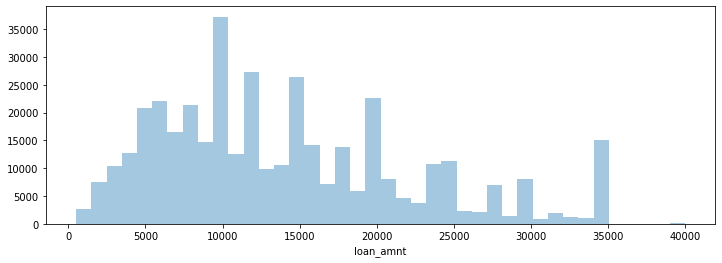

In [10]:
plt.figure(figsize=(12,4))
sns.distplot(df['loan_amnt'], kde=False, bins=40)

In [11]:
#Let's explore correlation between the continuous feature variables.
df.corr()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
loan_amnt,1.000000,0.168921,0.953929,0.336887,0.016636,0.198556,-0.077779,0.328320,0.099911,0.223886,0.222315,-0.106539
int_rate,0.168921,1.000000,0.162758,-0.056771,0.079038,0.011649,0.060986,-0.011280,0.293659,-0.036404,-0.082583,0.057450
installment,0.953929,0.162758,1.000000,0.330381,0.015786,0.188973,-0.067892,0.316455,0.123915,0.202430,0.193694,-0.098628
annual_inc,0.336887,-0.056771,0.330381,1.000000,-0.081685,0.136150,-0.013720,0.299773,0.027871,0.193023,0.236320,-0.050162
dti,0.016636,0.079038,0.015786,-0.081685,1.000000,0.136181,-0.017639,0.063571,0.088375,0.102128,-0.025439,-0.014558
open_acc,0.198556,0.011649,0.188973,0.136150,0.136181,1.000000,-0.018392,0.221192,-0.131420,0.680728,0.109205,-0.027732
pub_rec,-0.077779,0.060986,-0.067892,-0.013720,-0.017639,-0.018392,1.000000,-0.101664,-0.075910,0.019723,0.011552,0.699408
revol_bal,0.328320,-0.011280,0.316455,0.299773,0.063571,0.221192,-0.101664,1.000000,0.226346,0.191616,0.194925,-0.124532
revol_util,0.099911,0.293659,0.123915,0.027871,0.088375,-0.131420,-0.075910,0.226346,1.000000,-0.104273,0.007514,-0.086751
total_acc,0.223886,-0.036404,0.202430,0.193023,0.102128,0.680728,0.019723,0.191616,-0.104273,1.000000,0.381072,0.042035


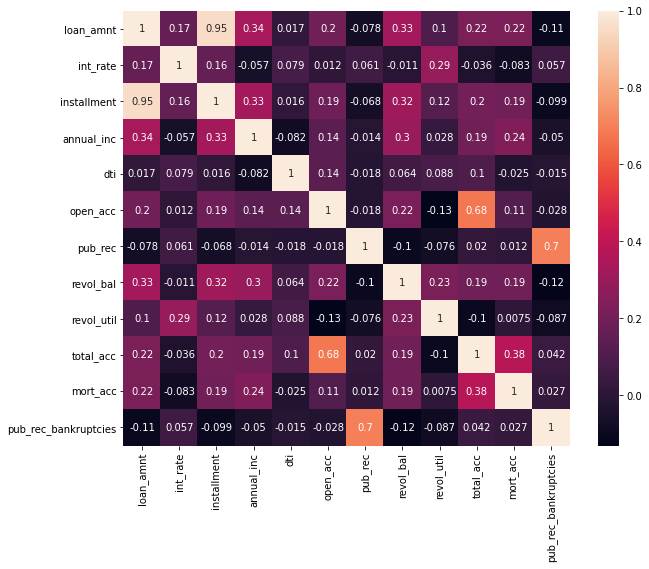

In [12]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True)

"loan_amnt" feature has almost perfect correlation with the "installment" feature. So, let's Explore this feature further.

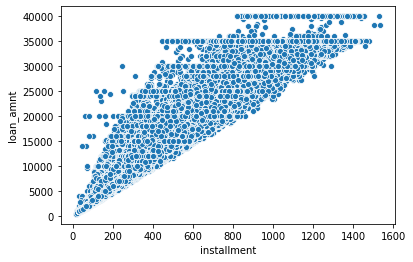

In [13]:
sns.scatterplot(x='installment', y='loan_amnt', data=df)

Since installment is calculated from loan_amnt. And it is directly depend upon loan_amnt. So we can say that the correlation between installment and loan_amnt is instrinctive and spontaneous.

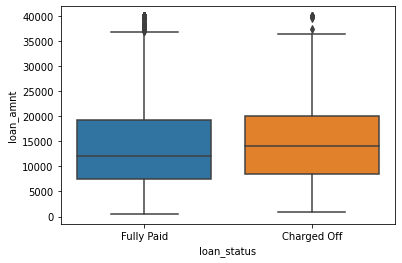

In [14]:
sns.boxplot(x=df['loan_status'], y=df['loan_amnt'])

From above boxplot it is clear that those users who have borrrowed high loan_amnt was not be able to fully pay back their loans.

In [15]:
df.groupby(['loan_status'])['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,15126.300967,8505.090557,1000.0,8525.0,14000.0,20000.0,40000.0
Fully Paid,318357.0,13866.878771,8302.319699,500.0,7500.0,12000.0,19225.0,40000.0


In [16]:
#getting unique possible grades and subgrades
grade=sorted(df['grade'].unique())
subgrade=sorted(df['sub_grade'].unique())

In [17]:
grade

['A', 'B', 'C', 'D', 'E', 'F', 'G']

In [18]:
subgrade

['A1',
 'A2',
 'A3',
 'A4',
 'A5',
 'B1',
 'B2',
 'B3',
 'B4',
 'B5',
 'C1',
 'C2',
 'C3',
 'C4',
 'C5',
 'D1',
 'D2',
 'D3',
 'D4',
 'D5',
 'E1',
 'E2',
 'E3',
 'E4',
 'E5',
 'F1',
 'F2',
 'F3',
 'F4',
 'F5',
 'G1',
 'G2',
 'G3',
 'G4',
 'G5']

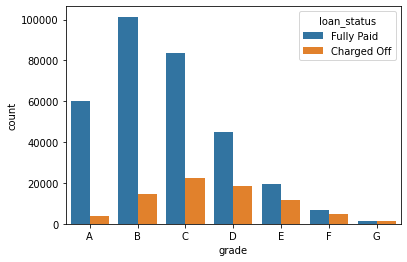

In [19]:
sns.countplot(x='grade', hue='loan_status', data=df, order=grade)

From above plot it is clear that those the ratio of Fully Paid with Charged Off is decreasing as the grades become higher. Which is natural like A grade users would be able to fully pay back their loan amnt as compare to low grade users.

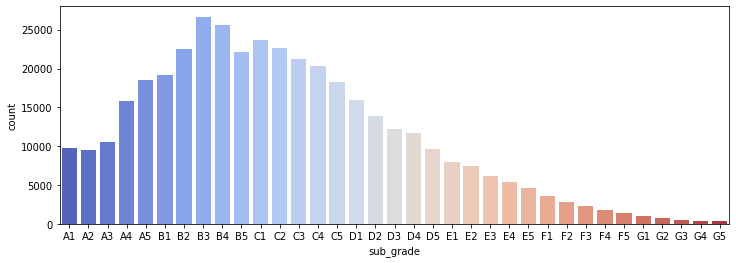

In [20]:
plt.figure(figsize=(12,4))
sns.countplot(x='sub_grade', data=df, order=subgrade, palette='coolwarm')

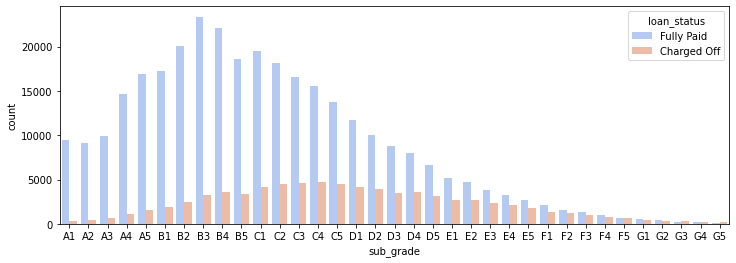

In [21]:
plt.figure(figsize=(12,4))
sns.countplot(x='sub_grade', hue='loan_status', data=df, order=subgrade, palette='coolwarm')

**It looks like F and G subgrades don't get paid back that often. So let's isloate those and recreate the countplot just for those subgrades.**

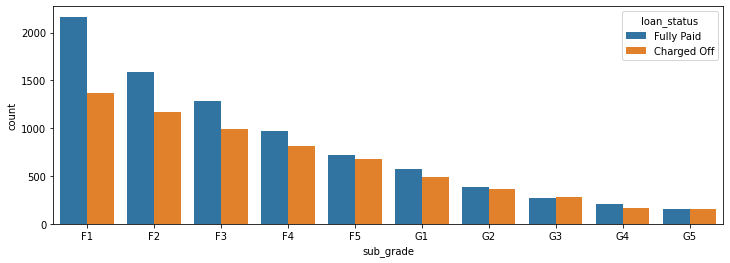

In [22]:
fng=df[(df['grade']=='F') | (df['grade']=='G')]

plt.figure(figsize=(12,4))
sns.countplot(x='sub_grade', hue='loan_status', data=fng, order=sorted(fng['sub_grade'].unique()))

**Create a new column called 'loan_repaid' which will contain a 1 if the loan status was "Fully Paid" and a 0 if it was "Charged Off".**

In [23]:
df['loan_status'].unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

In [24]:
df['loan_repaid']=df.apply(lambda a: 1 if a['loan_status']=='Fully Paid' else 0, axis=1)

In [25]:
df[['loan_repaid', 'loan_status']]

,loan_repaid,loan_status
0,1,Fully Paid
1,1,Fully Paid
2,1,Fully Paid
3,1,Fully Paid
4,0,Charged Off
...,...,...
396025,1,Fully Paid
396026,1,Fully Paid
396027,1,Fully Paid
396028,1,Fully Paid


**Now "loan_repaid" feature is now our label column**

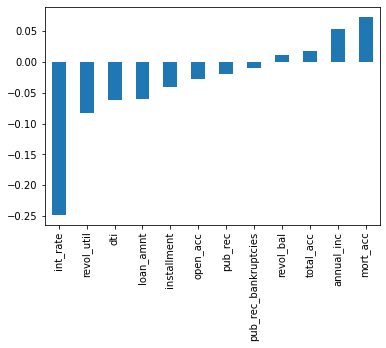

In [26]:
#showing the correlation of the numeric features to the loan_repaid column.
df.corr()['loan_repaid'].sort_values().drop('loan_repaid').plot(kind='bar')

----
## Data PreProcessing
----

In [27]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,loan_repaid
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690",1
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113",1
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113",1
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813",1
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650",0


## Missing Data

In [28]:
#length of the dataframe?
len(df)

396030

In [29]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'title',
       'dti', 'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'application_type',
       'mort_acc', 'pub_rec_bankruptcies', 'address', 'loan_repaid'],
      dtype='object')

In [30]:
# total count of missing values per column.
df.isna().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

In [31]:
100*df.isna().sum()/len(df)

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               5.789208
emp_length              4.621115
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.443148
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                9.543469
pub_rec_bankruptcies    0.135091
address                 0.000000
loan_repaid             0.000000
dtype: float64

In [32]:
#unique employment job titles
df['emp_title'].nunique()

173105

In [33]:
df['emp_title'].value_counts()

Teacher                                  4389
Manager                                  4250
Registered Nurse                         1856
RN                                       1846
Supervisor                               1830
                                         ... 
Deputy Chief Wing Weapons and Tactics       1
Support Enforcement Officer                 1
Fairway Outdoor Advertising                 1
Sr. HR Manager                              1
scott peraria builders                      1
Name: emp_title, Length: 173105, dtype: int64

Realistically there are too many unique job titles to try to convert this to a dummy variable feature. So let's remove that emp_title column.

In [34]:
df.drop(['emp_title'], axis=1, inplace=True)

In [35]:
#unique emp_length feature column
sorted(df['emp_length'].dropna().unique())

['1 year',
 '10+ years',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
 '< 1 year']

In [36]:
emp_length=['< 1 year',
 '1 year',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
 '10+ years'
 ]

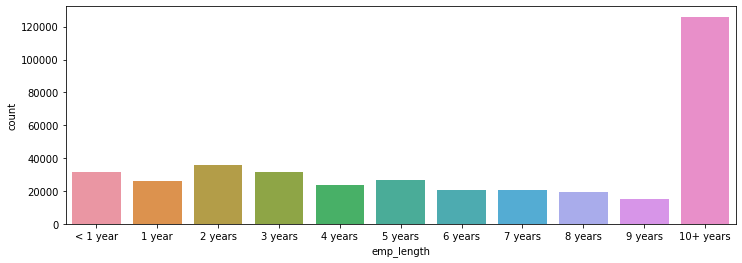

In [37]:
plt.figure(figsize=(12,4))
sns.countplot(df['emp_length'], order=emp_length)

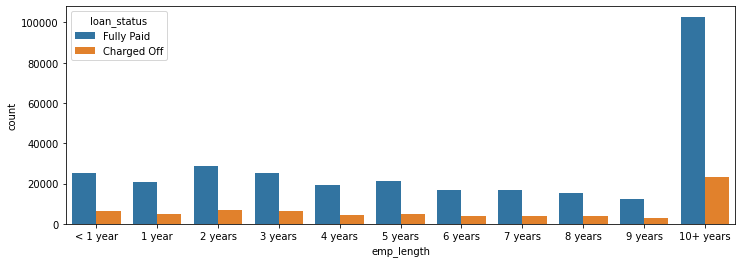

In [38]:
plt.figure(figsize=(12,4))
sns.countplot(df['emp_length'], hue=df['loan_status'], order=emp_length)

In [39]:
emp_length_df=df.groupby('loan_status')['emp_length'].value_counts()['Charged Off']/df.groupby('loan_status')['emp_length'].value_counts()['Fully Paid']

In [40]:
#the ratio of charged off users with fully paid users
emp_length_df

emp_length
1 year       0.248649
10+ years    0.225770
2 years      0.239560
3 years      0.242593
4 years      0.238213
5 years      0.237911
6 years      0.233341
7 years      0.241887
8 years      0.249625
9 years      0.250735
< 1 year     0.260830
Name: emp_length, dtype: float64

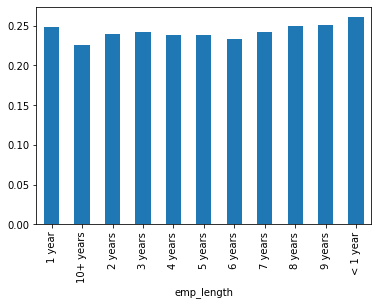

In [41]:
emp_length_df.plot(kind='bar')

**From the above plot it is clear that charge off rates are extremely similar across all employment lengths. So let's drop the emp_length column.**

In [42]:
df.drop(['emp_length'], axis=1, inplace=True)

**Revisiting the DataFrame to see what feature columns still have missing data.**

In [43]:
df.isna().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

**Reviewing  the title column vs the purpose column. Is this repeated information?**

In [44]:
df['purpose'].head(10)

0              vacation
1    debt_consolidation
2           credit_card
3           credit_card
4           credit_card
5    debt_consolidation
6      home_improvement
7           credit_card
8    debt_consolidation
9    debt_consolidation
Name: purpose, dtype: object

In [45]:
df['title'].head(10)

0                   Vacation
1         Debt consolidation
2    Credit card refinancing
3    Credit card refinancing
4      Credit Card Refinance
5         Debt consolidation
6           Home improvement
7       No More Credit Cards
8         Debt consolidation
9         Debt Consolidation
Name: title, dtype: object

**The title column is simply a string subcategory/description of the purpose column. So let's drop the title column.**

In [46]:
df.drop(['title'], axis=1, inplace=True)

In [47]:
#value_counts of the mort_acc column.
df['mort_acc'].value_counts()

0.0     139777
1.0      60416
2.0      49948
3.0      38049
4.0      27887
5.0      18194
6.0      11069
7.0       6052
8.0       3121
9.0       1656
10.0       865
11.0       479
12.0       264
13.0       146
14.0       107
15.0        61
16.0        37
17.0        22
18.0        18
19.0        15
20.0        13
24.0        10
22.0         7
21.0         4
25.0         4
27.0         3
23.0         2
32.0         2
26.0         2
31.0         2
30.0         1
28.0         1
34.0         1
Name: mort_acc, dtype: int64

**Let's review the other columns to see which most highly correlates to mort_acc**

In [48]:
df.corr()['mort_acc'].sort_values()

int_rate               -0.082583
dti                    -0.025439
revol_util              0.007514
pub_rec                 0.011552
pub_rec_bankruptcies    0.027239
loan_repaid             0.073111
open_acc                0.109205
installment             0.193694
revol_bal               0.194925
loan_amnt               0.222315
annual_inc              0.236320
total_acc               0.381072
mort_acc                1.000000
Name: mort_acc, dtype: float64

**Looks like the total_acc feature correlates with the mort_acc , this makes sense! Let's try this fillna() approach. We will group the dataframe by the total_acc and calculate the mean value for the mort_acc per total_acc entry. To get the result below:**

In [49]:
#Mean of mort_acc column per total_acc
total_acc_ave=df.groupby('total_acc')['mort_acc'].mean()

In [50]:
def fill_mort_acc(mort_acc, total_acc):
    if np.isnan(mort_acc):
        return total_acc_ave[total_acc]
    else:
        return mort_acc

In [51]:
df['mort_acc']=df.apply(lambda a:fill_mort_acc(a['mort_acc'], a['total_acc']), axis=1)

In [52]:
df.isna().sum()

loan_amnt                 0
term                      0
int_rate                  0
installment               0
grade                     0
sub_grade                 0
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
loan_status               0
purpose                   0
dti                       0
earliest_cr_line          0
open_acc                  0
pub_rec                   0
revol_bal                 0
revol_util              276
total_acc                 0
initial_list_status       0
application_type          0
mort_acc                  0
pub_rec_bankruptcies    535
address                   0
loan_repaid               0
dtype: int64

**revol_util and pub_rec_bankruptcies have missing data points, but they account for less than 0.5% of the total data. So let's remove the rows that are missing those values in those columns with dropna().**

In [53]:
df=df.dropna()

In [54]:
df.isna().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
address                 0
loan_repaid             0
dtype: int64

In [55]:
df=df.reset_index(drop=True)

## Categorical Variables and Dummy Variables

In [56]:
#List all the columns that are currently non-numeric.
df.select_dtypes(['object']).columns

Index(['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'earliest_cr_line',
       'initial_list_status', 'application_type', 'address'],
      dtype='object')

### term feature

In [57]:
df['term'].value_counts()

 36 months    301247
 60 months     93972
Name: term, dtype: int64

Converting the term feature into either a 36 or 60 integer numeric data type.

In [58]:
df['term']=df['term'].apply(lambda a: 36 if a == ' 36 months' else 60)

### grade feature

**As grade is part of sub_grade, so just drop the grade feature.**

In [59]:
df.drop(['grade'], axis=1, inplace=True)

**Converting the subgrade into dummy variables.**

In [60]:
sub_grade_dummies=pd.get_dummies(df['sub_grade'], drop_first=True)

In [61]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'sub_grade',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'purpose', 'dti', 'earliest_cr_line', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'application_type', 'mort_acc',
       'pub_rec_bankruptcies', 'address', 'loan_repaid'],
      dtype='object')

In [62]:
df=pd.concat([df, sub_grade_dummies], axis=1)

In [63]:
df.drop(['sub_grade'], axis=1, inplace=True)

In [64]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'dti', 'earliest_cr_line', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'application_type', 'mort_acc', 'pub_rec_bankruptcies', 'address',
       'loan_repaid', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5',
       'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2',
       'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4',
       'G5'],
      dtype='object')

In [65]:
df.select_dtypes('object').columns

Index(['home_ownership', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'earliest_cr_line', 'initial_list_status',
       'application_type', 'address'],
      dtype='object')

### verification_status, application_type, initial_list_status, purpose 

In [66]:
df['verification_status'].value_counts()

Verified           139451
Source Verified    131301
Not Verified       124467
Name: verification_status, dtype: int64

In [67]:
verification_status_dummies=pd.get_dummies(df['verification_status'], prefix='verification_status', prefix_sep='_', drop_first=True)

In [68]:
df=pd.concat([df, verification_status_dummies], axis=1).drop(['verification_status'], axis=1)

In [69]:
df['application_type'].value_counts()

INDIVIDUAL    394508
JOINT            425
DIRECT_PAY       286
Name: application_type, dtype: int64

In [70]:
application_type_dummies=pd.get_dummies(df['application_type'], prefix='application_type', prefix_sep='_', drop_first=True)

In [71]:
df=pd.concat([df, application_type_dummies], axis=1).drop(['application_type'], axis=1)

In [72]:
df['initial_list_status'].value_counts()

f    237346
w    157873
Name: initial_list_status, dtype: int64

In [73]:
initial_list_status_dummies=pd.get_dummies(df['initial_list_status'], prefix='initial_list_status', prefix_sep='_', drop_first=True)

In [74]:
df=pd.concat([df, initial_list_status_dummies], axis=1).drop(['initial_list_status'], axis=1)

In [75]:
df['purpose'].value_counts()

debt_consolidation    234169
credit_card            82923
home_improvement       23961
other                  21059
major_purchase          8756
small_business          5656
car                     4670
medical                 4175
moving                  2842
vacation                2442
house                   2197
wedding                 1794
renewable_energy         329
educational              246
Name: purpose, dtype: int64

In [76]:
purpose_dummies=pd.get_dummies(df['purpose'], prefix='purpose', prefix_sep='_', drop_first=True)

In [77]:
df=pd.concat([df, purpose_dummies], axis=1).drop(['purpose'], axis=1)

### home_ownership

In [78]:
df['home_ownership'].value_counts()

MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          110
NONE            29
ANY              3
Name: home_ownership, dtype: int64

In [79]:
#replacing NONE and ANY with OTHER
df['home_ownership']=df['home_ownership'].apply(lambda a: 'OTHER' if (a == 'ANY') | (a == 'NONE') else a)

In [80]:
home_ownership_dummies=pd.get_dummies(df['home_ownership'], prefix='home_ownership', prefix_sep='_', drop_first=True)

In [81]:
df=pd.concat([df, home_ownership_dummies], axis=1).drop(['home_ownership'], axis=1)

### address

In [82]:
df['zipcode']=df['address'].apply(lambda a: a[-5:])

In [83]:
zipcode_dummies=pd.get_dummies(df['zipcode'], drop_first=True)

In [84]:
df=pd.concat([df, zipcode_dummies], axis=1).drop(['address'], axis=1)

In [85]:
df.drop(['zipcode'], axis=1, inplace=True)

### issue_d 

In [86]:
#dropping issue_d feature
df.drop(['issue_d'], axis=1, inplace=True)

### earliest_cr_line
**TASK: This appears to be a historical time stamp feature. Extract the year from this feature using a .apply function, then convert it to a numeric feature. Set this new data to a feature column called 'earliest_cr_year'.Then drop the earliest_cr_line feature.**

In [87]:
df['earliest_cr_year']=df['earliest_cr_line'].apply(lambda a: int(a[-4:]))

In [88]:
df.drop(['earliest_cr_line'], axis=1, inplace=True)

In [89]:
df.select_dtypes('object').columns

Index(['loan_status'], dtype='object')

In [90]:
df.drop(['loan_status'], axis=1, inplace=True)

## Train Test Split

In [91]:
from sklearn.model_selection import train_test_split

In [92]:
#df1 = df.sample(frac=0.1,random_state=101)
print(len(df))

395219


In [93]:
y=df['loan_repaid'].values
X=df.drop('loan_repaid', axis=1).values

In [94]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

## Normalizing the Data

**Using a MinMaxScaler to normalize the feature data X_train and X_test. Recall we don't want data leakge from the test set so we only fit on the X_train data.**

In [95]:
from sklearn.preprocessing import MinMaxScaler

In [96]:
scaler=MinMaxScaler()

In [97]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

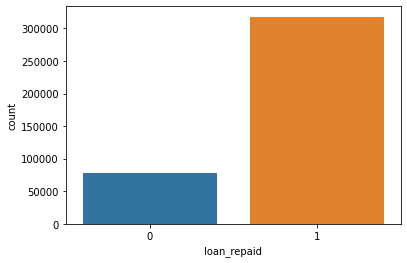

In [98]:
sns.countplot(df['loan_repaid'])

### SMOTE for oversampling
This is done to handle the imbalanceness of the dataset.

In [99]:
"""
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1))) 
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0))) 
from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state = 2) 
X_train_res, y_train_res = sm.fit_sample(X_train, y_train) 
print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape)) 
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape)) 
  
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1))) 
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0)))
"""

'\nprint("Before OverSampling, counts of label \'1\': {}".format(sum(y_train == 1))) \nprint("Before OverSampling, counts of label \'0\': {} \n".format(sum(y_train == 0))) \nfrom imblearn.over_sampling import SMOTE \nsm = SMOTE(random_state = 2) \nX_train_res, y_train_res = sm.fit_sample(X_train, y_train) \nprint(\'After OverSampling, the shape of train_X: {}\'.format(X_train_res.shape)) \nprint(\'After OverSampling, the shape of train_y: {} \n\'.format(y_train_res.shape)) \n  \nprint("After OverSampling, counts of label \'1\': {}".format(sum(y_train_res == 1))) \nprint("After OverSampling, counts of label \'0\': {}".format(sum(y_train_res == 0)))\n'

# Creating the Model

In [100]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [101]:
X_train.shape

(316175, 78)

**Building a sequential model to be trained on the data. Our model goes 78 --> 39 --> 19--> 1 output neuron.**

In [112]:
# CODE HERE
model = Sequential()

model.add(Dense(78, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(39, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(19, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')

In [103]:
early_stopping=EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20)

**Fitting the model to the training data for at least 25 epochs. Also adding in the validation data for later plotting.**

In [113]:
model.fit(x=X_train, y=y_train, epochs=50, batch_size=128, validation_data=(X_test, y_test))

Train on 316175 samples, validate on 79044 samples
Epoch 1/50
316175/316175 [==============================] - 9s 29us/sample - loss: 0.3189 - val_loss: 0.2655
Epoch 2/50
316175/316175 [==============================] - 8s 27us/sample - loss: 0.2717 - val_loss: 0.2662
Epoch 3/50
316175/316175 [==============================] - 8s 26us/sample - loss: 0.2683 - val_loss: 0.2644
Epoch 4/50
316175/316175 [==============================] - 8s 26us/sample - loss: 0.2669 - val_loss: 0.2647
Epoch 5/50
316175/316175 [==============================] - 8s 26us/sample - loss: 0.2664 - val_loss: 0.2644
Epoch 6/50
316175/316175 [==============================] - 8s 26us/sample - loss: 0.2659 - val_loss: 0.2636
Epoch 7/50
316175/316175 [==============================] - 8s 26us/sample - loss: 0.2654 - val_loss: 0.2644
Epoch 8/50
316175/316175 [==============================] - 8s 26us/sample - loss: 0.2651 - val_loss: 0.2646
Epoch 9/50
316175/316175 [==============================] - 9s 28us/sample - 

In [114]:
#saving the model
model.save('model/LendingClubModel.h5')

In [115]:
from tensorflow.keras.models import load_model

In [116]:
lending_model=load_model('model/LendingClubModel.h5')

# Evaluating Model Performance.

**Ploting out the validation loss versus the training loss.**

In [118]:
losses=pd.DataFrame(model.history.history)

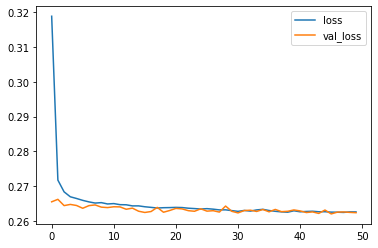

In [119]:
losses.plot()

In [120]:
from sklearn.metrics import classification_report, confusion_matrix

In [121]:
predictions=model.predict_classes(X_test)

In [122]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      0.43      0.60     15658
           1       0.88      1.00      0.93     63386

    accuracy                           0.89     79044
   macro avg       0.94      0.71      0.77     79044
weighted avg       0.90      0.89      0.87     79044



In [123]:
print(confusion_matrix(y_test, predictions))

[[ 6735  8923]
 [   14 63372]]


**Inference**

In [124]:
import random
random.seed(101)
random_ind = random.randint(0,len(df))

new_customer = df.drop('loan_repaid',axis=1).iloc[random_ind]
new_customer

loan_amnt           25000.00
term                   60.00
int_rate               18.24
installment           638.11
annual_inc          61665.00
                      ...   
48052                   0.00
70466                   0.00
86630                   0.00
93700                   0.00
earliest_cr_year     1996.00
Name: 304691, Length: 78, dtype: float64

In [125]:
new_customer=scaler.transform(new_customer.values.reshape(1,78))

In [126]:
print(model.predict_classes(new_customer))

[[1]]


**Now let's check, did this person actually end up paying back their loan?**

In [127]:
df.iloc[random_ind]['loan_repaid']

1.0

## Finished